# 感知机改进算法

## 导包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

## 导入数据集

In [2]:
data = pd.read_csv(r"./dataset/breast-cancer.data",header=None,names=['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


## 数据解释  
1.类别：无复发事件，复发事件  
2.年龄：10-19、20-29、30-39、40-49、50-59、60-69、70-79、80-89、90 -99。  
3.更年期：lt40，ge40，premeno。  
4.肿瘤大小：0-4、5-9、10-14、15-19、20-24、25-29、30-34、35-39、40-44、45-49、50-54， 55-59。  
5. inv节点：0-2、3-5、6-8、9-11、12-14、15-17、18-20、21-23、24-26、27-29、30-32， 33-35、36-39。  
6. node-caps：是，否。  
7.度畸变：1、2、3。8  
.乳房：左，右。  
9.胸四肢：左上，左下，右上，右下，中央。  
10.辐照度：是，否。  

### 选择数据集中四列数据  
两列作为输入数据，一列作为输出数据

In [3]:
col = ['tumor-size','deg-malig','irradiat']
data = pd.DataFrame(data,columns = col)
data

,tumor-size,deg-malig,irradiat
0,30-34,3,no
1,20-24,2,no
2,20-24,2,no
3,15-19,2,no
4,0-4,2,no
...,...,...,...
281,30-34,2,no
282,20-24,3,yes
283,20-24,1,no
284,30-34,3,no


## 数据预处理  

In [4]:
data.loc[(data['tumor-size']=='0-4'),'tumor-size'] = np.random.uniform(0,4)
data.loc[(data['tumor-size']=='5-9'),'tumor-size'] = np.random.uniform(5,9)
data.loc[(data['tumor-size']=='10-14'),'tumor-size'] = np.random.uniform(10,14)
data.loc[(data['tumor-size']=='15-19'),'tumor-size'] = np.random.uniform(15,19)
data.loc[(data['tumor-size']=='20-24'),'tumor-size'] = np.random.uniform(20,24)
data.loc[(data['tumor-size']=='25-29'),'tumor-size'] = np.random.uniform(25,29)
data.loc[(data['tumor-size']=='30-34'),'tumor-size'] = np.random.uniform(30,34)
data.loc[(data['tumor-size']=='35-39'),'tumor-size'] = np.random.uniform(35,39)
data.loc[(data['tumor-size']=='40-44'),'tumor-size'] = np.random.uniform(40,44)
data.loc[(data['tumor-size']=='45-49'),'tumor-size'] = np.random.uniform(45,49)
data.loc[(data['tumor-size']=='50-54'),'tumor-size'] = np.random.uniform(50,54)
data.loc[(data['tumor-size']=='55-59'),'tumor-size'] = np.random.uniform(55,59)
data.loc[(data['irradiat']=='no'),'irradiat'] = -1
data.loc[(data['irradiat']=='yes'),'irradiat'] = 1
data

,tumor-size,deg-malig,irradiat
0,30.4096,3,-1
1,20.4582,2,-1
2,20.4582,2,-1
3,16.1417,2,-1
4,3.49728,2,-1
...,...,...,...
281,30.4096,2,-1
282,20.4582,3,1
283,20.4582,1,-1
284,30.4096,3,-1


In [5]:
test_data = data.values

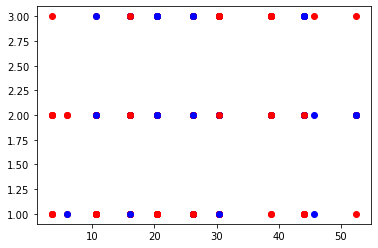

In [6]:
for i in range(len(test_data)):
    if test_data[i][-1] == -1:
        plt.scatter(test_data[i][0],test_data[i][1],c='r')
    else:
        plt.scatter(test_data[i][0],test_data[i][1],c='b')
plt.show()

In [7]:
# 打乱数据
data = data.sample(frac=1)
data

,tumor-size,deg-malig,irradiat
222,26.2177,3,1
113,10.6693,1,-1
258,30.4096,2,1
178,26.2177,2,1
285,30.4096,3,-1
...,...,...,...
278,38.6895,3,-1
69,52.444,2,-1
233,16.1417,1,1
174,26.2177,2,1


In [8]:
# 取特征值
tumor_data = data.values
# tumor_feature = tumor_data[0:,0:2]
# 展示前十行
# tumor_feature[0:10]

In [9]:
training = tumor_data[0:228]
test = tumor_data[229:]
test[10]

array([30.40958806605104, 3, -1], dtype=object)

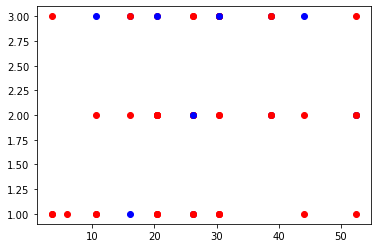

In [10]:
for i in range(len(test)):
    if test[i][-1:] == -1:
        plt.scatter(test[i][0],test[i][1],c='r')
    else:
        plt.scatter(test[i][0],test[i][1],c='b')
plt.show()

In [11]:
x = test[0][:-1]
x

array([26.21765835398525, 2], dtype=object)

In [12]:
y = test[0][-1:]
y

array([-1], dtype=object)

## 一些工具函数

In [13]:
def makeArray(I,J):
    m = []
    for i in range(I):
        fill = np.random.random()
        m.append([fill]*J)
    return m

In [14]:
def step(a):
    if a>0:
        return 1
    else:
        return 0

In [15]:
def sign(a):
    if a>0:
        return 1
    else:
        return -1

## 零、感知机模型

In [16]:
# def feeling():
#     w = np.zeros(2)
#     lr = 0.01
#     c = 1
# #     循环遍历计数
#     cnt = 0
#     while True:
#         cnt += 1
# #         遍历次数超过1000时跳出循环，学习结束
#         if cnt > 1000:
#             break
#         for i in range(len(training)):
#             x = np.array(training[i][:-1])
#             y = np.array(training[i][-1])

#             s = np.sum(w*x)-c
#             z = sign(s)
#             e = y-z
#             w = w+lr*e*x
#             c = np.sum(c+lr*e)
            
            
#     for i in range(len(training)):
#         if training[i][-1:] == -1:
#             plt.scatter(training[i][0],training[i][1],c='r')
#         else:
#             plt.scatter(training[i][0],training[i][1],c='b')
#     X = np.random.uniform(0,60,100)
#     Y = -(w[0]*X-c)/w[1]
#     plt.plot(X,Y,'g')
#     plt.show()
#     return cnt,w,c

In [17]:
def feeling():
    w = np.zeros(2)
    lr = 0.1
    c = 1
#     循环遍历计数
    cnt = 0
    while True:
        cnt += 1
#         遍历次数超过1000时跳出循环，学习结束
        if cnt > 1000:
            break
        for i in range(len(training)):
            x = np.array(training[i][:-1])
            y = np.array(training[i][-1])

            s = np.sum(w*x)-c
            z = sign(s)
            if y * z <= 0:
                e = y-z
                w = w+lr*e*x
                c = np.sum(c+lr*e)
    return cnt,w,c

迭代次数： 1001
超平面法向量： [-154.7070798603608 -1872.2000000024002]
阈值： -6912.999999995904


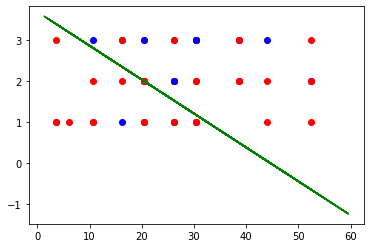

准确率： 0.45614035087719296


In [18]:
if __name__=='__main__':
    cnt,w,c=feeling()
    print("迭代次数：",cnt)
    print("超平面法向量：",w)
    print("阈值：",c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
        result = sign(np.sum(w*test[i][:-1])-c)
        if test[i][-1:] == -1:
            plt.scatter(test[i][0],test[i][1],c='r')
        else:
            plt.scatter(test[i][0],test[i][1],c='b')
        if(target == result):
            count += 1
    accuracy = float(count/len(test))
    X = np.random.uniform(0,60,50)
    Y = -(w[0]*X-c)/w[1]
    plt.plot(X,Y,'g')
    plt.show()
    print("准确率：",accuracy)

## 一、口袋算法

In [19]:
def checkErrorRate(test,w,c):
    count=0
    for i in range(len(test)):
        x=np.array(test[i][:-1])
        y=test[i][-1]
        if np.sign(np.sum(w*x)-c)!=np.sign(y):
            count+=1
    return count/len(test)

In [20]:
def Pocket():
    w = np.zeros(2)
    lr = 0.1
    c = 1
    best_w = w
    bestRate = 1
    best_c = c
#     循环遍历计数
    cnt = 0
    while True:
        cnt += 1
#         遍历次数超过1000时跳出循环，学习结束
        if cnt > 1000:
            break
        for i in range(len(training)):
            x = np.array(training[i][:-1])
            y = training[i][-1]
            
            s = np.sum(w*x)-c
            z = sign(s)
            if y*z <= 0:
                e = y-z
                w = w+lr*e*x
                c = np.sum(c+lr*e)
                rate = checkErrorRate(training,w,c)
                if rate<bestRate:
                    bestRate = rate
                    best_w = w
                    best_c = c
    return cnt,best_w,best_c

迭代次数： 1001
超平面法向量： [-2.972246794593744 -0.2]
阈值： 0.8


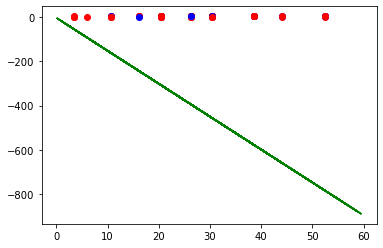

准确率： 0.7894736842105263


In [21]:
if __name__=='__main__':
    cnt,best_w,best_c=Pocket()
    print("迭代次数：",cnt)
    print("超平面法向量：",best_w)
    print("阈值：",best_c)
    count = 0
    for i in range(len(test)):
        target = test[i][-1:]
        result = sign(np.sum(best_w*test[i][:-1])-best_c)
        if(target == result):
            count += 1
        if test[i][-1] == -1:
            plt.scatter(test[i][0],test[i][1],c='r')
        else:
            plt.scatter(test[i][0],test[i][1],c='b')
    accuracy = float(count/len(test))
    X = np.random.uniform(0,60,100)
    Y = -(best_w[0]*X-best_c)/best_w[1]
    plt.plot(X,Y,'g')
    plt.show()
    print("准确率：",accuracy)